## Importing all the necessary libraries

In [1]:
import tensorflow as tf

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
pip --version

pip 22.0.4 from C:\Users\abhij\Desktop\Image Classification\imageclassification\lib\site-packages\pip (python 3.9)

Note: you may need to restart the kernel to use updated packages.


In [4]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
import os
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.image import imread
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, BatchNormalization
from keras.losses import CategoricalCrossentropy
from tensorflow.keras.preprocessing import image

## Getting the tomato dataset

In [6]:
dataset_directory_location = 'tomato'

In [7]:
os.listdir(dataset_directory_location)

['train', 'val']

In [8]:
train_dataset_location = os.path.join(dataset_directory_location, 'train')
test_dataset_location = os.path.join(dataset_directory_location, 'val')

In [9]:
os.listdir(train_dataset_location)

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___healthy',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']

In [10]:
os.listdir(test_dataset_location)

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___healthy',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']

In [11]:
tomato_bacterial_spot_img = os.path.join(train_dataset_location, 'Tomato___Bacterial_spot')

In [12]:
os.listdir(tomato_bacterial_spot_img)[:1]

['00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.JPG']

In [13]:
tomato_bacterial_spot_img_read = imread(os.path.join(tomato_bacterial_spot_img, '00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.JPG'))

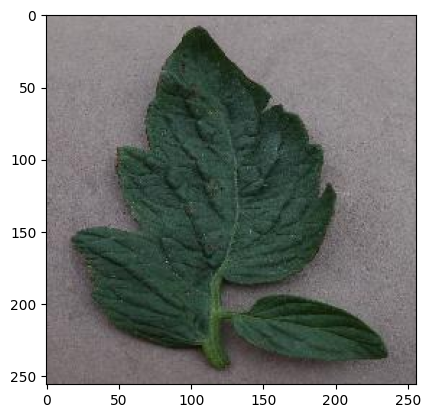

In [14]:
plt.imshow(tomato_bacterial_spot_img_read)

In [15]:
tomato_bacterial_spot_img_read.shape

(256, 256, 3)

In [16]:
image_shape = (256, 256, 3)

In [17]:
image_gen = ImageDataGenerator(rotation_range=20, 
                               width_shift_range=0.1, 
                               height_shift_range=0.1, 
                               shear_range=0.1, 
                               zoom_range=0.1, 
                               horizontal_flip=True, 
                               fill_mode='nearest',
                               rescale=1./255)

In [18]:
train_image_gen = image_gen.flow_from_directory(train_dataset_location, 
                                                target_size=image_shape[:2], 
                                                color_mode='rgb', 
                                                batch_size=16, 
                                                class_mode='categorical')

test_image_gen = image_gen.flow_from_directory(test_dataset_location, 
                                                target_size=image_shape[:2], 
                                                color_mode='rgb', 
                                                batch_size=16, 
                                                class_mode='categorical')

Found 10000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [19]:
train_image_gen.class_indices

{'Tomato___Bacterial_spot': 0,
 'Tomato___Early_blight': 1,
 'Tomato___Late_blight': 2,
 'Tomato___Leaf_Mold': 3,
 'Tomato___Septoria_leaf_spot': 4,
 'Tomato___Spider_mites Two-spotted_spider_mite': 5,
 'Tomato___Target_Spot': 6,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7,
 'Tomato___Tomato_mosaic_virus': 8,
 'Tomato___healthy': 9}

In [20]:
test_image_gen.class_indices

{'Tomato___Bacterial_spot': 0,
 'Tomato___Early_blight': 1,
 'Tomato___Late_blight': 2,
 'Tomato___Leaf_Mold': 3,
 'Tomato___Septoria_leaf_spot': 4,
 'Tomato___Spider_mites Two-spotted_spider_mite': 5,
 'Tomato___Target_Spot': 6,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7,
 'Tomato___Tomato_mosaic_virus': 8,
 'Tomato___healthy': 9}

## Listing the directories present inside tomato dataset

## Getting the shape of the image

## Creating and training the model

In [21]:
model = Sequential()

In [22]:
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(256,256,3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())


model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(10, activation='softmax'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 252, 252, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 32)     0         
 )                                                               
                                                        

In [24]:
model.compile(loss=CategoricalCrossentropy(), optimizer=Adam(learning_rate=2e-4), metrics=['accuracy'])

In [25]:
history = model.fit(train_image_gen, validation_data=test_image_gen, epochs=30)

Epoch 1/30
625/625 [==============================] - 158s 241ms/step - loss: 1.2709 - accuracy: 0.5853 - val_loss: 1.3047 - val_accuracy: 0.5730
Epoch 2/30
625/625 [==============================] - 1406s 2s/step - loss: 0.8680 - accuracy: 0.7131 - val_loss: 1.5427 - val_accuracy: 0.5930
Epoch 3/30
625/625 [==============================] - 153s 244ms/step - loss: 0.7378 - accuracy: 0.7568 - val_loss: 0.4259 - val_accuracy: 0.8650
Epoch 4/30
625/625 [==============================] - 157s 251ms/step - loss: 0.6098 - accuracy: 0.7979 - val_loss: 0.5139 - val_accuracy: 0.8280
Epoch 5/30
625/625 [==============================] - 162s 258ms/step - loss: 0.5201 - accuracy: 0.8306 - val_loss: 0.4023 - val_accuracy: 0.8660
Epoch 6/30
625/625 [==============================] - 160s 256ms/step - loss: 0.4847 - accuracy: 0.8360 - val_loss: 0.3533 - val_accuracy: 0.8730
Epoch 7/30
625/625 [==============================] - 162s 258ms/step - loss: 0.4573 - accuracy: 0.8514 - val_loss: 0.6968 - v

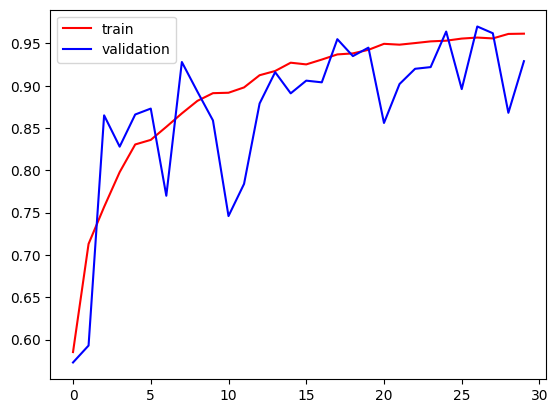

In [26]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color = 'red',label='train')
plt.plot(history.history['val_accuracy'],color = 'blue',label = 'validation')
plt.legend()
plt.show()

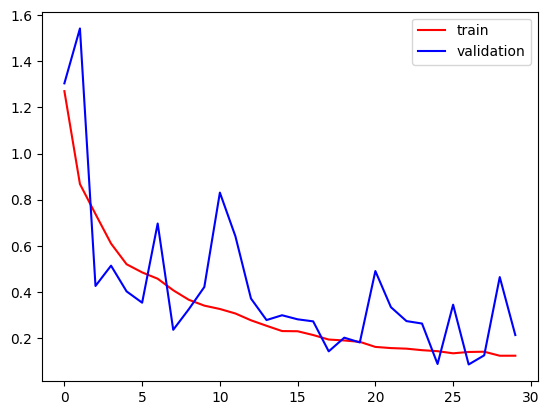

In [27]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],color = 'red',label='train')
plt.plot(history.history['val_loss'],color = 'blue',label = 'validation')
plt.legend()
plt.show()

In [28]:
model.evaluate(train_image_gen)[1]

625/625 [==============================] - 126s 202ms/step - loss: 0.1497 - accuracy: 0.9495


0.9495000243186951

In [29]:
model.evaluate(test_image_gen)[1]

63/63 [==============================] - 12s 189ms/step - loss: 0.1831 - accuracy: 0.9400


0.9399999976158142

In [54]:
sample_img_load = image.load_img('tomato/val/Tomato___Tomato_Yellow_Leaf_Curl_Virus/1b1762b5-7aef-463c-ab99-bcc49246407a___UF.GRC_YLCV_Lab 01470.JPG', target_size=image_shape)

In [55]:
sample_img_to_arr = image.img_to_array(sample_img_load) / 255

In [56]:
sample_img_to_arr_expand_dim = np.expand_dims(sample_img_to_arr, 0) 

In [57]:
prediction = model.predict(sample_img_to_arr_expand_dim)[0]

1/1 [==============================] - 0s 259ms/step


In [58]:
pred_result = np.argmax(prediction)
pred_result

7

In [59]:
class_names = ['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']

In [60]:
pred_final_result = class_names[pred_result]

In [61]:
confidence = np.max(prediction) * 100
confidence = "{:.2f}".format(confidence)

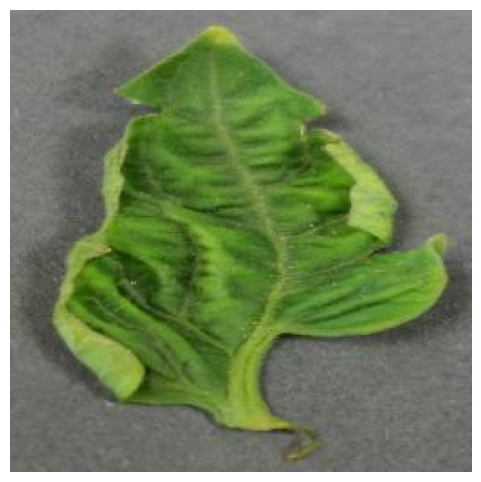

Tomato___Tomato_Yellow_Leaf_Curl_Virus with a confidence of 99.26%


In [62]:
plt.figure(figsize=(6, 6))
plt.imshow(sample_img_load)
plt.axis('off')
plt.show()
print(f'{pred_final_result} with a confidence of {confidence}%')

In [63]:
pred_final_result

'Tomato___Tomato_Yellow_Leaf_Curl_Virus'

In [64]:
pip install h5py

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\abhij\Desktop\Image Classification\imageclassification\Scripts\python.exe -m pip install --upgrade pip' command.


In [65]:
model1 = model.save(r'C:\Users\abhij\Desktop\Image Classification\cnn.h5')